In [216]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from nltk.tokenize import word_tokenize
from collections import  Counter


In [326]:
#read pickle file
train_data=pd.read_pickle("train_first_data.pkl")
train_data

,ID,Review,Rating
0,0,exceptional service nice daughter priced king ...,5
1,1,beautiful relaxing jw marriott desert ridge ou...,5
2,2,location location min subway take blommingdale...,5
3,3,pleased nice safe flower market vast array res...,3
4,4,excellent service excellent location couple mi...,4
...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5
14339,14339,excellent florence chosen tripadviser hidden g...,5
14340,14340,place relax vacation book trip paradisus husba...,4
14341,14341,week seattle loved minute pacific plaza buy im...,3


Text(0.5, 1.0, 'Word count vs Number of documents')

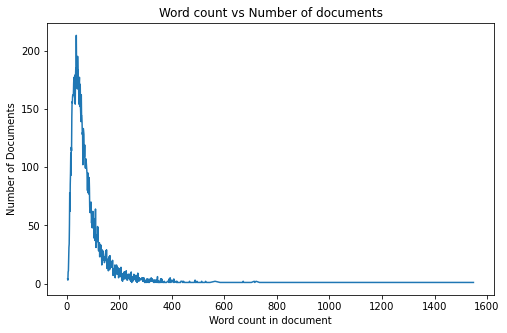

In [218]:
#plot the word length of reviews
word_length= pd.DataFrame({'doc_length': train_data.Review.apply(lambda x: len(x.split()))})

# Group the documents based on their number of words (i.e. length)
grouped = word_length.groupby('doc_length')

indices = grouped.indices
word_count = []
doc_count = []
counter = 0
for w,d in indices.items():
    word_count.append(w)
    doc_count.append(len(d))

# Plot the distribution of words vs documents in the corpus
plt.figure(figsize=(8,5))
plt.plot(word_count, doc_count)
plt.xlabel('Word count in document')
plt.ylabel('Number of Documents')
plt.title('Word count vs Number of documents')

here we can see that most of the reviews word length between 100 and 200

In [219]:
train_data["word_length"]=word_length

In [220]:
train_data[train_data["word_length"]>100]

,ID,Review,Rating,word_length
8,8,march wonderful relaxing vacation catalonia ma...,4,126
14,14,beautiful return start kind scared read everyo...,4,240
17,17,impression maile sky court bit small adequate ...,4,105
23,23,definately princess boyfriend night barcelona ...,5,176
34,34,high rise high price night october book intern...,3,104
...,...,...,...,...
14326,14326,awesome trip whats checked site everyday left ...,5,118
14328,14328,star beware smoking room booked package read r...,1,113
14333,14333,ahead husband sister yr daughter witnessed top...,5,154
14334,14334,star star location reception pleasant cheerful...,4,145


In [221]:
#Remove the reviews word length>200
train_data.drop(train_data[(train_data.word_length > 100)&(train_data.Rating==5)].index, inplace = True)

In [327]:
train_data

,ID,Review,Rating
0,0,exceptional service nice daughter priced king ...,5
1,1,beautiful relaxing jw marriott desert ridge ou...,5
2,2,location location min subway take blommingdale...,5
3,3,pleased nice safe flower market vast array res...,3
4,4,excellent service excellent location couple mi...,4
...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5
14339,14339,excellent florence chosen tripadviser hidden g...,5
14340,14340,place relax vacation book trip paradisus husba...,4
14341,14341,week seattle loved minute pacific plaza buy im...,3


In [328]:
#read pickle file for test data
test_data=pd.read_pickle("test_df.pkl")
test_data

,ID,Review
0,0,just superb rendezvous just perfect property s...
1,1,better close staten island ferry easy subway ...
2,2,enjoyed stay just come long weekend barcelona...
3,3,muse great muse hotel great did n t hear noi...
4,4,conveniently located morning flight family st...
...,...,...
6143,6143,great hotel precruise great hotel arrived earl...
6144,6144,great choice just returned nights grand hotel ...
6145,6145,overpriced tiny rooms kowloon past use date ne...
6146,6146,ok agree said positive staff helpful rooms cl...


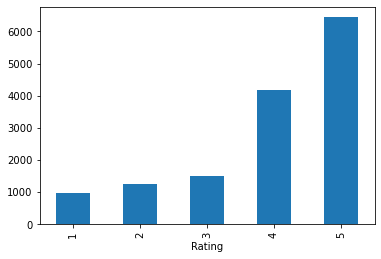

In [329]:
rating_count=train_data.groupby(by='Rating').ID.count()
rating_count.plot.bar()
plt.show()

Text(0.5, 1.0, 'Word count vs Number of documents')

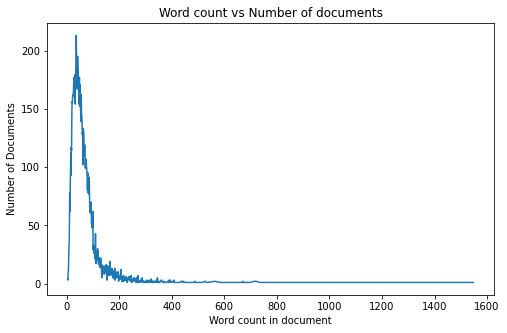

In [226]:
#plot the word length of reviews
word_length= pd.DataFrame({'doc_length': train_data.Review.apply(lambda x: len(x.split()))})

# Group the documents based on their number of words (i.e. length)
grouped = word_length.groupby('doc_length')

indices = grouped.indices
word_count = []
doc_count = []
counter = 0
for w,d in indices.items():
    word_count.append(w)
    doc_count.append(len(d))

# Plot the distribution of words vs documents in the corpus
plt.figure(figsize=(8,5))
plt.plot(word_count, doc_count)
plt.xlabel('Word count in document')
plt.ylabel('Number of Documents')
plt.title('Word count vs Number of documents')

In [330]:
train_data.groupby(by='Rating').ID.count()

Rating
1     977
2    1248
3    1510
4    4172
5    6436
Name: ID, dtype: int64

In [331]:
#splitting the data for trainung and testing

In [332]:
X=train_data['Review']
y=train_data['Rating']
test_X=test_data["Review"]

In [333]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [334]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10757,)
(3586,)
(10757,)
(3586,)


In [335]:
#pickle stopwords

stop= pd.read_pickle('stp_wrds.pkl')

In [336]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced' ,np.unique(y_train),y_train)

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1 2 3 4 5], y=7990     5
7911     5
9532     2
5012     5
14288    5
        ..
905      2
5192     5
12172    5
235      5
13349    2
Name: Rating, Length: 10757, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [337]:
class_weights.sort()

In [338]:
weights={}

for index, weight in enumerate(class_weights) :
    weights[index]=weight

In [339]:
weights

{0: 0.4468120456905504,
 1: 0.6825507614213198,
 2: 1.915761353517364,
 3: 2.3108485499462943,
 4: 2.9230978260869565}

In [340]:
weight={1:0.4468120456905504,
 2: 0.6825507614213198,
 3: 1.915761353517364,
 4: 2.3108485499462943,
 5: 2.9230978260869565}

# Text Representation.Bag of word approach

In [247]:
vect=CountVectorizer(tokenizer=word_tokenize,stop_words=stop, max_df=0.75, lowercase=False, ngram_range=(1,2))
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [248]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<3284x430784 sparse matrix of type '<class 'numpy.int64'>'
	with 289175 stored elements in Compressed Sparse Row format>

# Model building

We will use the following four models:

Logistic Regression

(Multinomial) Naive Bayes

Linear Support Vector Machine

Xgboost

SGD classifier

In [376]:
def NB_Classifier_result(X, y,X_test,y_test):
    NB = MultinomialNB()
    NB.fit(X, y)
    prediction = NB.predict(X_test)
    print(classification_report(prediction, y_test))
    print(metrics.accuracy_score(y_test,prediction))
    print("NB Classifier result:")
    return 


In [377]:
def LG_Classifier_result(X, y,X_test,y_test):
    LG = LogisticRegression()
    LG.fit(X,y)
    prediction = LG.predict(X_test)
    print(classification_report(prediction, y_test))
    print(metrics.accuracy_score(y_test,prediction))
    print(" LG Classifier result:")
     
    return

In [378]:
def SVM_Classifier_result(X, y,X_test,y_test):
    SVM = LinearSVC()
    SVM.fit(X,y)
    prediction = SVM.predict(X_test)
    print(classification_report(prediction, y_test))
    print(metrics.accuracy_score(y_test,prediction))
    print(" SVM Classifier result:")
    return 

In [379]:
def XG_Classifier_result(X, y,X_test,y_test):
    XGB = XGBClassifier(objective='multi:softmax', n_estimators=100, learning_rate=0.3, max_depth=4, subsample=0.8, n_iter_no_change=2, verbosity=1)
    XGB.fit(X,y)
    prediction = XGB.predict(X_test)
    print(classification_report(prediction, y_test))
    print(metrics.accuracy_score(y_test,prediction))
    print(" XGB Classifier result:")
    return 

In [380]:
def SGD_Classifier_result(X, y,X_test,y_test):
    SGD = SGDClassifier(max_iter=1000, tol=0.01)
    SGD.fit(X,y)
    prediction = SGD.predict(X_test)
    print(classification_report(prediction, y_test))
    print(metrics.accuracy_score(y_test,prediction))
    print(" SGD Classifier result:")
    return 

In [381]:

def RF_Classifier_result(X, y,X_test,y_test):
    RF = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)
    RF.fit(X,y)
    prediction = RF.predict(X_test)
    print(classification_report(prediction, y_test))
    print(metrics.accuracy_score(y_test,prediction))
    print(" RF Classifier result:")
    return

# Random Oversampling Imbalanced Datasets

How to improve the performance?

Re-sampling Dataset

To make our dataset balanced there are two ways to do so:

Under-sampling: Remove samples from over-represented classes ; use this if you have huge dataset

Over-sampling: Add more samples from under-represented classes; use this if you have small dataset
 


Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

RandomOverSampler

SMOTE



In [98]:
#smote
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train_dtm, y_train)
print(X_sm.shape, y_sm.shape)

(13013, 5000) (13013,)


C:\Users\sathi\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [99]:
#Random oversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train_dtm, y_train)
print(X_ros.shape, y_ros.shape)

(19500, 5000) (19500,)


In [100]:
#RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus= rus.fit_sample(X_train_dtm, y_train)
print(X_rus.shape, y_rus.shape)

(3690, 5000) (3690,)


In [101]:
#TomekLinks
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X_train_dtm, y_train)

C:\Users\sathi\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [102]:
#ClusterCentroids
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X_train_dtm, y_train)

In [103]:
#SMOTETomek
from imblearn.combine import SMOTETomek

smt = SMOTETomek('auto')
X_smt, y_smt = smt.fit_sample(X_train_dtm, y_train)

C:\Users\sathi\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


# Pasing imbalanced data(bow)

In [163]:
print(NB_Classifier_result(X_train_dtm, y_train,X_test_dtm,y_test))
print(LG_Classifier_result(X_train_dtm, y_train,X_test_dtm,y_test))
print(SVM_Classifier_result(X_train_dtm, y_train,X_test_dtm,y_test))
print(XG_Classifier_result(X_train_dtm, y_train,X_test_dtm,y_test))
print(SGD_Classifier_result(X_train_dtm, y_train,X_test_dtm,y_test))
print(RF_Classifier_result(X_train_dtm, y_train,X_test_dtm,y_test))

NB Classifier result:
              precision    recall  f1-score   support

           1       0.64      0.52      0.57       291
           2       0.34      0.33      0.34       330
           3       0.28      0.36      0.31       285
           4       0.38      0.54      0.44       719
           5       0.81      0.65      0.72      1659

    accuracy                           0.56      3284
   macro avg       0.49      0.48      0.48      3284
weighted avg       0.61      0.56      0.57      3284

0.5578562728380024
(0.5578562728380024, '              precision    recall  f1-score   support\n\n           1       0.64      0.52      0.57       291\n           2       0.34      0.33      0.34       330\n           3       0.28      0.36      0.31       285\n           4       0.38      0.54      0.44       719\n           5       0.81      0.65      0.72      1659\n\n    accuracy                           0.56      3284\n   macro avg       0.49      0.48      0.48      3284\nweig

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 LG Classifier result:
              precision    recall  f1-score   support

           1       0.54      0.57      0.56       227
           2       0.31      0.35      0.33       284
           3       0.31      0.32      0.32       354
           4       0.50      0.51      0.50      1005
           5       0.73      0.69      0.71      1414

    accuracy                           0.56      3284
   macro avg       0.48      0.49      0.48      3284
weighted avg       0.57      0.56      0.56      3284

0.5572472594397077
(0.5572472594397077, '              precision    recall  f1-score   support\n\n           1       0.54      0.57      0.56       227\n           2       0.31      0.35      0.33       284\n           3       0.31      0.32      0.32       354\n           4       0.50      0.51      0.50      1005\n           5       0.73      0.69      0.71      1414\n\n    accuracy                           0.56      3284\n   macro avg       0.48      0.49      0.48      3284\nwei

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 SVM Classifier result:
              precision    recall  f1-score   support

           1       0.42      0.49      0.45       204
           2       0.26      0.29      0.28       282
           3       0.28      0.27      0.27       371
           4       0.46      0.45      0.45      1047
           5       0.68      0.66      0.67      1380

    accuracy                           0.51      3284
   macro avg       0.42      0.43      0.43      3284
weighted avg       0.51      0.51      0.51      3284

0.5060901339829477
(0.5060901339829477, '              precision    recall  f1-score   support\n\n           1       0.42      0.49      0.45       204\n           2       0.26      0.29      0.28       282\n           3       0.28      0.27      0.27       371\n           4       0.46      0.45      0.45      1047\n           5       0.68      0.66      0.67      1380\n\n    accuracy                           0.51      3284\n   macro avg       0.42      0.43      0.43      3284\nwe

# Building and evaluating a model using balanced data

# Passing SMOTE

In [164]:
print(NB_Classifier_result(X_sm, y_sm,X_test_dtm,y_test))
print(LG_Classifier_result(X_sm, y_sm,X_test_dtm,y_test))
print(SVM_Classifier_result(X_sm, y_sm,X_test_dtm,y_test))
print(XG_Classifier_result(X_sm, y_sm,X_test_dtm,y_test))
print(SGD_Classifier_result(X_sm, y_sm,X_test_dtm,y_test))
print(RF_Classifier_result(X_sm, y_sm,X_test_dtm,y_test))

NB Classifier result:
              precision    recall  f1-score   support

           1       0.60      0.53      0.57       270
           2       0.37      0.33      0.35       353
           3       0.28      0.36      0.31       285
           4       0.38      0.54      0.44       717
           5       0.81      0.65      0.72      1659

    accuracy                           0.56      3284
   macro avg       0.49      0.48      0.48      3284
weighted avg       0.61      0.56      0.57      3284

0.5584652862362972
(0.5584652862362972, '              precision    recall  f1-score   support\n\n           1       0.60      0.53      0.57       270\n           2       0.37      0.33      0.35       353\n           3       0.28      0.36      0.31       285\n           4       0.38      0.54      0.44       717\n           5       0.81      0.65      0.72      1659\n\n    accuracy                           0.56      3284\n   macro avg       0.49      0.48      0.48      3284\nweig

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 LG Classifier result:
              precision    recall  f1-score   support

           1       0.58      0.45      0.50       309
           2       0.32      0.37      0.35       277
           3       0.31      0.33      0.32       342
           4       0.49      0.52      0.51       988
           5       0.72      0.70      0.71      1368

    accuracy                           0.55      3284
   macro avg       0.48      0.47      0.48      3284
weighted avg       0.56      0.55      0.56      3284

0.5532886723507917
(0.5532886723507917, '              precision    recall  f1-score   support\n\n           1       0.58      0.45      0.50       309\n           2       0.32      0.37      0.35       277\n           3       0.31      0.33      0.32       342\n           4       0.49      0.52      0.51       988\n           5       0.72      0.70      0.71      1368\n\n    accuracy                           0.55      3284\n   macro avg       0.48      0.47      0.48      3284\nwei

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 SVM Classifier result:
              precision    recall  f1-score   support

           1       0.55      0.46      0.50       287
           2       0.25      0.29      0.27       266
           3       0.29      0.30      0.30       355
           4       0.45      0.46      0.46      1010
           5       0.68      0.66      0.67      1366

    accuracy                           0.51      3284
   macro avg       0.44      0.43      0.44      3284
weighted avg       0.52      0.51      0.52      3284

0.5121802679658952
(0.5121802679658952, '              precision    recall  f1-score   support\n\n           1       0.55      0.46      0.50       287\n           2       0.25      0.29      0.27       266\n           3       0.29      0.30      0.30       355\n           4       0.45      0.46      0.46      1010\n           5       0.68      0.66      0.67      1366\n\n    accuracy                           0.51      3284\n   macro avg       0.44      0.43      0.44      3284\nwe

# Passing Random over sampler

In [165]:
print(NB_Classifier_result(X_ros, y_ros,X_test_dtm,y_test))
print(LG_Classifier_result(X_ros, y_ros,X_test_dtm,y_test))
print(SVM_Classifier_result(X_ros, y_ros,X_test_dtm,y_test))
print(XG_Classifier_result(X_ros, y_ros,X_test_dtm,y_test))
print(SGD_Classifier_result(X_ros, y_ros,X_test_dtm,y_test))
print(RF_Classifier_result(X_ros, y_ros,X_test_dtm,y_test))

NB Classifier result:
              precision    recall  f1-score   support

           1       0.59      0.52      0.55       270
           2       0.38      0.33      0.35       368
           3       0.34      0.35      0.34       353
           4       0.36      0.55      0.43       671
           5       0.81      0.66      0.73      1622

    accuracy                           0.56      3284
   macro avg       0.49      0.48      0.48      3284
weighted avg       0.60      0.56      0.57      3284

0.5566382460414129
(0.5566382460414129, '              precision    recall  f1-score   support\n\n           1       0.59      0.52      0.55       270\n           2       0.38      0.33      0.35       368\n           3       0.34      0.35      0.34       353\n           4       0.36      0.55      0.43       671\n           5       0.81      0.66      0.73      1622\n\n    accuracy                           0.56      3284\n   macro avg       0.49      0.48      0.48      3284\nweig

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 LG Classifier result:
              precision    recall  f1-score   support

           1       0.58      0.57      0.57       244
           2       0.34      0.34      0.34       321
           3       0.35      0.30      0.32       417
           4       0.47      0.51      0.49       959
           5       0.71      0.70      0.71      1343

    accuracy                           0.55      3284
   macro avg       0.49      0.48      0.49      3284
weighted avg       0.55      0.55      0.55      3284

0.5493300852618758
(0.5493300852618758, '              precision    recall  f1-score   support\n\n           1       0.58      0.57      0.57       244\n           2       0.34      0.34      0.34       321\n           3       0.35      0.30      0.32       417\n           4       0.47      0.51      0.49       959\n           5       0.71      0.70      0.71      1343\n\n    accuracy                           0.55      3284\n   macro avg       0.49      0.48      0.49      3284\nwei

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 SVM Classifier result:
              precision    recall  f1-score   support

           1       0.42      0.49      0.45       205
           2       0.28      0.30      0.29       294
           3       0.30      0.27      0.28       396
           4       0.44      0.45      0.45      1014
           5       0.68      0.66      0.67      1375

    accuracy                           0.51      3284
   macro avg       0.42      0.43      0.43      3284
weighted avg       0.51      0.51      0.51      3284

0.5054811205846529
(0.5054811205846529, '              precision    recall  f1-score   support\n\n           1       0.42      0.49      0.45       205\n           2       0.28      0.30      0.29       294\n           3       0.30      0.27      0.28       396\n           4       0.44      0.45      0.45      1014\n           5       0.68      0.66      0.67      1375\n\n    accuracy                           0.51      3284\n   macro avg       0.42      0.43      0.43      3284\nwe

# passing Random under sampler

In [167]:
print(NB_Classifier_result(X_rus, y_rus,X_test_dtm,y_test))
print(LG_Classifier_result(X_rus, y_rus,X_test_dtm,y_test))
print(SVM_Classifier_result(X_rus, y_rus,X_test_dtm,y_test))
print(XG_Classifier_result(X_rus, y_rus,X_test_dtm,y_test))
print(SGD_Classifier_result(X_rus, y_rus,X_test_dtm,y_test))
print(RF_Classifier_result(X_rus, y_rus,X_test_dtm,y_test))

NB Classifier result:
              precision    recall  f1-score   support

           1       0.68      0.50      0.58       327
           2       0.35      0.29      0.32       370
           3       0.37      0.29      0.32       468
           4       0.30      0.51      0.38       614
           5       0.75      0.66      0.70      1505

    accuracy                           0.52      3284
   macro avg       0.49      0.45      0.46      3284
weighted avg       0.56      0.52      0.53      3284

0.5225334957369062
(0.5225334957369062, '              precision    recall  f1-score   support\n\n           1       0.68      0.50      0.58       327\n           2       0.35      0.29      0.32       370\n           3       0.37      0.29      0.32       468\n           4       0.30      0.51      0.38       614\n           5       0.75      0.66      0.70      1505\n\n    accuracy                           0.52      3284\n   macro avg       0.49      0.45      0.46      3284\nweig

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 LG Classifier result:
              precision    recall  f1-score   support

           1       0.62      0.51      0.56       293
           2       0.36      0.30      0.33       371
           3       0.39      0.27      0.32       538
           4       0.43      0.51      0.47       868
           5       0.66      0.72      0.69      1214

    accuracy                           0.53      3284
   macro avg       0.49      0.46      0.47      3284
weighted avg       0.52      0.53      0.52      3284

0.52557856272838
(0.52557856272838, '              precision    recall  f1-score   support\n\n           1       0.62      0.51      0.56       293\n           2       0.36      0.30      0.33       371\n           3       0.39      0.27      0.32       538\n           4       0.43      0.51      0.47       868\n           5       0.66      0.72      0.69      1214\n\n    accuracy                           0.53      3284\n   macro avg       0.49      0.46      0.47      3284\nweighte

# TomekLinks


In [169]:
print(NB_Classifier_result(X_tl,y_tl,X_test_dtm,y_test))
print(LG_Classifier_result(X_tl,y_tl,X_test_dtm,y_test))
print(SVM_Classifier_result(X_tl,y_tl,X_test_dtm,y_test))
print(XG_Classifier_result(X_tl,y_tl,X_test_dtm,y_test))
print(SGD_Classifier_result(X_tl,y_tl,X_test_dtm,y_test))
print(RF_Classifier_result(X_tl,y_tl,X_test_dtm,y_test))

NB Classifier result:
              precision    recall  f1-score   support

           1       0.64      0.52      0.57       291
           2       0.34      0.33      0.34       330
           3       0.28      0.36      0.31       285
           4       0.38      0.54      0.44       720
           5       0.81      0.65      0.72      1658

    accuracy                           0.56      3284
   macro avg       0.49      0.48      0.48      3284
weighted avg       0.61      0.56      0.57      3284

0.557551766138855
(0.557551766138855, '              precision    recall  f1-score   support\n\n           1       0.64      0.52      0.57       291\n           2       0.34      0.33      0.34       330\n           3       0.28      0.36      0.31       285\n           4       0.38      0.54      0.44       720\n           5       0.81      0.65      0.72      1658\n\n    accuracy                           0.56      3284\n   macro avg       0.49      0.48      0.48      3284\nweight

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 LG Classifier result:
              precision    recall  f1-score   support

           1       0.54      0.57      0.56       229
           2       0.31      0.35      0.32       278
           3       0.31      0.32      0.32       354
           4       0.50      0.51      0.50      1020
           5       0.73      0.69      0.71      1403

    accuracy                           0.56      3284
   macro avg       0.48      0.49      0.48      3284
weighted avg       0.56      0.56      0.56      3284

0.5554202192448234
(0.5554202192448234, '              precision    recall  f1-score   support\n\n           1       0.54      0.57      0.56       229\n           2       0.31      0.35      0.32       278\n           3       0.31      0.32      0.32       354\n           4       0.50      0.51      0.50      1020\n           5       0.73      0.69      0.71      1403\n\n    accuracy                           0.56      3284\n   macro avg       0.48      0.49      0.48      3284\nwei

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 SVM Classifier result:
              precision    recall  f1-score   support

           1       0.43      0.49      0.46       207
           2       0.26      0.30      0.28       275
           3       0.28      0.27      0.27       371
           4       0.46      0.45      0.46      1047
           5       0.68      0.66      0.67      1384

    accuracy                           0.51      3284
   macro avg       0.42      0.44      0.43      3284
weighted avg       0.51      0.51      0.51      3284

0.5079171741778319
(0.5079171741778319, '              precision    recall  f1-score   support\n\n           1       0.43      0.49      0.46       207\n           2       0.26      0.30      0.28       275\n           3       0.28      0.27      0.27       371\n           4       0.46      0.45      0.46      1047\n           5       0.68      0.66      0.67      1384\n\n    accuracy                           0.51      3284\n   macro avg       0.42      0.44      0.43      3284\nwe

# SMOTETomek


In [198]:
print(NB_Classifier_result(X_smt,y_smt,X_test_dtm,y_test))
print(LG_Classifier_result(X_smt,y_smt,X_test_dtm,y_test))
print(SVM_Classifier_result(X_smt,y_smt,X_test_dtm,y_test))
print(XG_Classifier_result(X_smt,y_smt,X_test_dtm,y_test))
print(SGD_Classifier_result(X_smt,y_smt,X_test_dtm,y_test))
print(RF_Classifier_result(X_smt,y_smt,X_test_dtm,y_test))

NB Classifier result:
              precision    recall  f1-score   support

           1       0.61      0.55      0.58       265
           2       0.39      0.35      0.37       350
           3       0.31      0.36      0.33       321
           4       0.37      0.54      0.44       722
           5       0.81      0.66      0.73      1626

    accuracy                           0.56      3284
   macro avg       0.50      0.49      0.49      3284
weighted avg       0.60      0.56      0.57      3284

0.5605968331303288
(0.5605968331303288, '              precision    recall  f1-score   support\n\n           1       0.61      0.55      0.58       265\n           2       0.39      0.35      0.37       350\n           3       0.31      0.36      0.33       321\n           4       0.37      0.54      0.44       722\n           5       0.81      0.66      0.73      1626\n\n    accuracy                           0.56      3284\n   macro avg       0.50      0.49      0.49      3284\nweig

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 LG Classifier result:
              precision    recall  f1-score   support

           1       0.59      0.55      0.57       258
           2       0.33      0.32      0.33       331
           3       0.33      0.30      0.31       397
           4       0.49      0.50      0.49      1006
           5       0.68      0.70      0.69      1292

    accuracy                           0.54      3284
   macro avg       0.48      0.47      0.48      3284
weighted avg       0.54      0.54      0.54      3284

0.5414129110840439
(0.5414129110840439, '              precision    recall  f1-score   support\n\n           1       0.59      0.55      0.57       258\n           2       0.33      0.32      0.33       331\n           3       0.33      0.30      0.31       397\n           4       0.49      0.50      0.49      1006\n           5       0.68      0.70      0.69      1292\n\n    accuracy                           0.54      3284\n   macro avg       0.48      0.47      0.48      3284\nwei

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 SVM Classifier result:
              precision    recall  f1-score   support

           1       0.51      0.51      0.51       242
           2       0.27      0.26      0.27       321
           3       0.30      0.25      0.28       440
           4       0.44      0.46      0.45       986
           5       0.65      0.67      0.66      1295

    accuracy                           0.50      3284
   macro avg       0.44      0.43      0.43      3284
weighted avg       0.49      0.50      0.50      3284

0.4993909866017052
(0.4993909866017052, '              precision    recall  f1-score   support\n\n           1       0.51      0.51      0.51       242\n           2       0.27      0.26      0.27       321\n           3       0.30      0.25      0.28       440\n           4       0.44      0.46      0.45       986\n           5       0.65      0.67      0.66      1295\n\n    accuracy                           0.50      3284\n   macro avg       0.44      0.43      0.43      3284\nwe

# TF-IDF approach

In [350]:
vectorizer = TfidfVectorizer(tokenizer=word_tokenize,stop_words=stop, lowercase=False, ngram_range=(1,2))

In [351]:
#transforming test data and train data in to a document term matrix
X_Train_Dtm=vectorizer.fit_transform(X_train)
X_Test_Dtm=vectorizer.transform(X_test)

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [352]:
X_Train_Dtm.shape, y_train.shape,X_Test_Dtm.shape, y_test.shape

((10757, 515625), (10757,), (3586, 515625), (3586,))

# Build a model : Passing imbalanced data

In [370]:
print(NB_Classifier_result(X_Train_Dtm, y_train,X_Test_Dtm,y_test))
print(LG_Classifier_result(X_Train_Dtm, y_train,X_Test_Dtm,y_test)) 
print(SVM_Classifier_result(X_Train_Dtm, y_train,X_Test_Dtm,y_test))
print(XG_Classifier_result(X_Train_Dtm, y_train,X_Test_Dtm,y_test))
print(SGD_Classifier_result(X_Train_Dtm, y_train,X_Test_Dtm,y_test))
print(RF_Classifier_result(X_Train_Dtm, y_train,X_Test_Dtm,y_test))


C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.45      0.62      3586

    accuracy                           0.45      3586
   macro avg       0.20      0.09      0.12      3586
weighted avg       1.00      0.45      0.62      3586

0.4520356943669827
NB Classifier result:
None


C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.46      0.76      0.57       144
           2       0.17      0.40      0.24       135
           3       0.06      0.34      0.10        65
           4       0.49      0.43      0.46      1166
           5       0.86      0.67      0.75      2076

    accuracy                           0.58      3586
   macro avg       0.41      0.52      0.42      3586
weighted avg       0.68      0.58      0.62      3586

0.5786391522587842
 LG Classifier result:
None
              precision    recall  f1-score   support

           1       0.59      0.59      0.59       242
           2       0.23      0.42      0.29       172
           3       0.16      0.39      0.22       155
           4       0.50      0.47      0.49      1085
           5       0.83      0.69      0.75      1932

    accuracy                           0.59      3586
   macro avg       0.46      0.51      0.47      3586
weighted avg       0.65      0

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'report' is not defined

# Build a model : Passing balanced data

In [371]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')

X_sm_t, y_sm_t = smote.fit_sample(X_Train_Dtm, y_train)
print(X_sm_t.shape, y_sm_t.shape)

C:\Users\sathi\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


(14836, 515625) (14836,)


In [372]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros_t, y_ros_t = ros.fit_sample(X_Train_Dtm, y_train)

In [373]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl_t, y_tl_t = tl.fit_sample(X_Train_Dtm, y_train)
X_tl_t.shape,y_tl_t.shape

C:\Users\sathi\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


((10334, 515625), (10334,))

In [374]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek('auto')
X_smt_t, y_smt_t = smt.fit_sample(X_Train_Dtm, y_train)

C:\Users\sathi\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [375]:
print(NB_Classifier_result(X_sm_t, y_sm_t,X_Test_Dtm,y_test))
print(LG_Classifier_result(X_sm_t, y_sm_t,X_Test_Dtm,y_test))
print(SVM_Classifier_result(X_sm_t, y_sm_t,X_Test_Dtm,y_test))
print(XG_Classifier_result(X_sm_t, y_sm_t,X_Test_Dtm,y_test))
print(SGD_Classifier_result(X_sm_t, y_sm_t,X_Test_Dtm,y_test))


C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.98      0.33      0.49       724
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.98      0.55      0.71      2862

    accuracy                           0.51      3586
   macro avg       0.39      0.18      0.24      3586
weighted avg       0.98      0.51      0.66      3586

0.507250418293363
NB Classifier result:
None


C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.86      0.46      0.60       454
           2       0.01      0.67      0.01         3
           3       0.04      0.37      0.07        41
           4       0.49      0.46      0.47      1085
           5       0.85      0.69      0.76      2003

    accuracy                           0.59      3586
   macro avg       0.45      0.53      0.38      3586
weighted avg       0.73      0.59      0.64      3586

0.5850529838259899
 LG Classifier result:
None
              precision    recall  f1-score   support

           1       0.77      0.56      0.65       328
           2       0.17      0.50      0.25       105
           3       0.16      0.41      0.23       145
           4       0.50      0.47      0.49      1085
           5       0.82      0.69      0.75      1923

    accuracy                           0.60      3586
   macro avg       0.48      0.53      0.47      3586
weighted avg       0.68      0

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'report' is not defined

In [382]:
print(RF_Classifier_result(X_sm_t, y_sm_t,X_Test_Dtm,y_test))

              precision    recall  f1-score   support

           1       0.48      0.60      0.54       192
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.03      0.29      0.05        89
           5       0.99      0.48      0.65      3305

    accuracy                           0.49      3586
   macro avg       0.30      0.28      0.25      3586
weighted avg       0.94      0.49      0.63      3586

0.4860568878973787
 RF Classifier result:
None


C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyper parameter tuning 

In [383]:
#SVC include parameter class_weight
from sklearn.svm import SVC
model = SVC(C=10, gamma=1,kernel='linear',class_weight=weight) 
model.fit(X_sm_t, y_sm_t)

SVC(class_weight={1: 0.4468120456905504, 2: 0.6825507614213198,
                  3: 1.915761353517364, 4: 2.3108485499462943,
                  5: 2.9230978260869565},
    kernel='linear')

In [384]:
predictions = model.predict(X_Test_Dtm) 

In [385]:
metrics.accuracy_score(y_test,predictions)

0.5984383714445064

In [390]:
#LOGISTIC REGRESSION
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
  
logreg_cv.fit(X_sm_t, y_sm_t) 

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [391]:
logreg_cv.best_score_

0.7218265475486416

In [392]:
logreg_cv.best_params_

{'C': 11787686.347935867}

In [397]:
lr=LogisticRegression(C=11787686.347935867,class_weight=weight)
lr.fit(X_sm_t, y_sm_t)

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=11787686.347935867,
                   class_weight={1: 0.4468120456905504, 2: 0.6825507614213198,
                                 3: 1.915761353517364, 4: 2.3108485499462943,
                                 5: 2.9230978260869565})

In [398]:
pred=lr.predict(X_Test_Dtm)
pred

array([4, 5, 5, ..., 5, 5, 5], dtype=int64)

In [399]:
metrics.accuracy_score(y_test,pred)

0.6017847183491355

In [317]:
# we have already a test data..we can apply test_X data to check the accuaracy of a predicted model
test_X=test_data["Review"]
test_X

0       just superb rendezvous just perfect property s...
1       better close staten island ferry easy subway  ...
2       enjoyed stay  just come long weekend barcelona...
3       muse great  muse hotel great  did n t hear noi...
4       conveniently located morning flight  family st...
                              ...                        
6143    great hotel precruise great hotel arrived earl...
6144    great choice just returned nights grand hotel ...
6145    overpriced tiny rooms kowloon past use date ne...
6146    ok  agree said positive staff helpful rooms cl...
6147    great location husband stayed new orleans     ...
Name: Review, Length: 6148, dtype: object

In [320]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_datas = vectorizer.transform(test_X)
X_test_datas

<6148x430784 sparse matrix of type '<class 'numpy.float64'>'
	with 506519 stored elements in Compressed Sparse Row format>

In [323]:
y_pred=model.predict(X_test_datas)
print(y_pred)

[5 4 4 ... 3 4 4]


In [ ]:
print(NB_Classifier_result())
print(LG_Classifier_result())
print(SVM_Classifier_result())
print(XG_Classifier_result())
print(SGD_Classifier_result())
print(RF_Classifier_result())

In [324]:
#upload sample submission file
sample_df=pd.read_csv("sample submission (2).csv")
sample_df

,ID,Rating
0,0,5
1,1,2
2,2,4
3,3,5
4,4,4
...,...,...
6143,6143,5
6144,6144,5
6145,6145,3
6146,6146,4


In [325]:
#adding predicted Item_Outlet_Sales in to sample_df
pred=pd.DataFrame(y_pred)
data=pd.concat([sample_df["ID"],pred],axis=1)

data.columns=["ID","Rating"]
data.to_csv("sample submission (2).csv",index=False)